In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,roc_auc_score
from xgboost import XGBClassifier

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,8]

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.options.display.max_columns=None

In [5]:
df=pd.read_csv('dia_ready_for_model.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,0,(0-10),6,18,1,1,41,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Caucasian,0,(10-20),1,1,7,3,59,0,18,0,0,0,3,3,3,9,0,0,0,0,0,0,0,0,3,1,1,1
2,AfricanAmerican,0,(20-30),1,1,7,2,11,5,13,2,0,1,11,3,0,6,0,0,0,0,2,0,0,0,0,0,1,0
3,Caucasian,1,(30-40),1,1,7,2,44,1,16,0,0,0,1,3,7,7,0,0,0,0,0,0,0,0,3,1,1,0
4,Caucasian,1,(40-50),1,1,7,1,51,0,8,0,0,0,2,2,3,5,0,0,0,0,2,0,0,0,2,1,1,0


In [6]:
import statsmodels.api as sm

In [7]:
## preparing the model for model.

In [8]:
df_dumy=pd.get_dummies(df,drop_first=True)

In [9]:
df_dumy.head()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_(10-20),age_(20-30),age_(30-40),age_(40-50),age_(50-60),age_(60-70),age_(70-80),age_(80-90),age_(90-100)
0,0,6,18,1,1,41,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,7,3,59,0,18,0,0,0,3,3,3,9,0,0,0,0,0,0,0,0,3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,1,7,2,11,5,13,2,0,1,11,3,0,6,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,1,7,2,44,1,16,0,0,0,1,3,7,7,0,0,0,0,0,0,0,0,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,1,1,7,1,51,0,8,0,0,0,2,2,3,5,0,0,0,0,2,0,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [10]:

X=df_dumy.drop('readmitted',axis=1)
y=df_dumy['readmitted']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10,stratify=y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49303, 39), (21131, 39), (49303,), (21131,))

## Logistic Regression`

In [13]:
lr=LogisticRegression(random_state=10)
modellr=lr.fit(X_train,y_train)


In [14]:
modellr=lr.fit(X_train,y_train)
predtrain_lr=modellr.predict(X_train)
predtest_lr=modellr.predict(X_test)


In [15]:
print(classification_report(y_train,predtrain_lr))
print(classification_report(y_test,predtest_lr))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74     29330
           1       0.59      0.22      0.32     19973

    accuracy                           0.62     49303
   macro avg       0.61      0.56      0.53     49303
weighted avg       0.61      0.62      0.57     49303

              precision    recall  f1-score   support

           0       0.63      0.89      0.74     12571
           1       0.58      0.23      0.33      8560

    accuracy                           0.62     21131
   macro avg       0.61      0.56      0.53     21131
weighted avg       0.61      0.62      0.57     21131



In [16]:
print(roc_auc_score(y_train,predtrain_lr)),

print(roc_auc_score(y_test,predtest_lr))

0.5586989162269848
0.5583052002941052


In [17]:
f1_score(y_test,predtest_lr)

0.326914992012108

In [18]:
f1_score(y_train,predtrain_lr)

0.32342250654259963

## Decision tree

In [19]:
dt=DecisionTreeClassifier(random_state=10)

In [20]:
modeldt=dt.fit(X_train,y_train)
predtrain_dt=modeldt.predict(X_train)
predtest_dt=modeldt.predict(X_test)

In [21]:
print(classification_report(y_train,predtrain_dt))
print(classification_report(y_test,predtest_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29330
           1       1.00      1.00      1.00     19973

    accuracy                           1.00     49303
   macro avg       1.00      1.00      1.00     49303
weighted avg       1.00      1.00      1.00     49303

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     12571
           1       0.44      0.46      0.45      8560

    accuracy                           0.54     21131
   macro avg       0.53      0.53      0.53     21131
weighted avg       0.55      0.54      0.55     21131



In [22]:
print(roc_auc_score(y_train,predtrain_dt)),
print(roc_auc_score(y_test,predtest_dt))

0.999974966204376
0.5309849912311158


In [23]:
## Gridsearch for Decision Tree

In [24]:
tunedparam=[{'criterion':['entropy','gini'],
            'max_depth':range(1,10),
             'min_samples_split': range(2,10),
             'min_samples_leaf': range(1,10),
             'max_leaf_nodes':range(1,10),
             'max_features':["auto", "sqrt", "log2"]          
            }]

In [25]:
dttuned=DecisionTreeClassifier(random_state=10)

dt_grid=GridSearchCV(estimator=dttuned,
                    param_grid=tunedparam,
                    cv=5)

In [26]:
modeldt_grid=dt_grid.fit(X_train,y_train)

In [27]:
print('Best parameters for random forest classifier: ', modeldt_grid.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [28]:
dtgrid=DecisionTreeClassifier(random_state=10,criterion='entropy',
                           max_depth=4,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_leaf_nodes=9,
                           max_features="log2")

In [29]:
modeldt_grid=dtgrid.fit(X_train,y_train)
predtrain_dt_grid=modeldt_grid.predict(X_train)
predtest_dt_grid=modeldt_grid.predict(X_test)

In [30]:
print(classification_report(y_train,predtrain_dt_grid))
print(classification_report(y_test,predtest_dt_grid))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     29330
           1       0.59      0.19      0.29     19973

    accuracy                           0.62     49303
   macro avg       0.61      0.55      0.51     49303
weighted avg       0.61      0.62      0.56     49303

              precision    recall  f1-score   support

           0       0.62      0.90      0.74     12571
           1       0.58      0.20      0.29      8560

    accuracy                           0.62     21131
   macro avg       0.60      0.55      0.52     21131
weighted avg       0.61      0.62      0.56     21131



In [31]:
print(roc_auc_score(y_train,predtrain_dt_grid)),
print(roc_auc_score(y_test,predtest_dt_grid))

0.5505831244153696
0.550364667009145


In [32]:
print(f1_score(y_train,predtrain_dt_grid)),
print(f1_score(y_test,predtest_dt_grid))

0.28729743064252916
0.2934592514865338


# Random Forest

In [33]:
rf=RandomForestClassifier(random_state=10)

modelrf=rf.fit(X_train,y_train)

predtrain_rf=modelrf.predict(X_train)
predtest_rf=modelrf.predict(X_test)

In [34]:
print(classification_report(y_train,predtrain_rf))
print(classification_report(y_test,predtest_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29330
           1       1.00      1.00      1.00     19973

    accuracy                           1.00     49303
   macro avg       1.00      1.00      1.00     49303
weighted avg       1.00      1.00      1.00     49303

              precision    recall  f1-score   support

           0       0.64      0.83      0.72     12571
           1       0.56      0.32      0.41      8560

    accuracy                           0.62     21131
   macro avg       0.60      0.58      0.57     21131
weighted avg       0.61      0.62      0.60     21131



In [35]:
print(roc_auc_score(y_train,predtrain_rf)),
print(roc_auc_score(y_test,predtest_rf))

0.9999829526082509
0.5750170155014843


In [36]:
print(f1_score(y_train,predtrain_rf)),
print(f1_score(y_test,predtest_rf))

0.9999749668310511
0.4097170789512665


In [37]:
modelrf.feature_importances_

array([0.0227088 , 0.03172586, 0.02343446, 0.02150915, 0.06920258,
       0.11715758, 0.04882185, 0.10013119, 0.01780438, 0.0114045 ,
       0.02305134, 0.06875397, 0.06974244, 0.06871085, 0.05029044,
       0.00658975, 0.022461  , 0.01620224, 0.00858091, 0.01416647,
       0.01365678, 0.01023979, 0.0089078 , 0.03088552, 0.0150054 ,
       0.00886433, 0.00158002, 0.0154421 , 0.00367015, 0.0053017 ,
       0.0012585 , 0.00272494, 0.00525194, 0.00934668, 0.01234216,
       0.01415477, 0.01243386, 0.01160029, 0.00488352])

## Gridsearch for Random Forest

In [38]:
tuned_grid =  [{
    'n_estimators': range(50, 150, 50),
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': range(50, 150, 50)
}]

In [39]:
rftuned = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = rftuned, 
                       param_grid = tuned_grid, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

In [40]:
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 100, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 50} 



In [41]:
rf_grid=RandomForestClassifier(random_state=10,
                               criterion='entropy',
                               max_depth=10,
                               max_features='sqrt',
                               max_leaf_nodes=100,
                               min_samples_leaf=50,
                               min_samples_split=50,
                               n_estimators=50)

modelrf_grid=rf_grid.fit(X_train,y_train)
predtrain_rf_grid=modelrf_grid.predict(X_train)
predtest_rf_grid=modelrf_grid.predict(X_test)

In [42]:
print(classification_report(y_train,predtrain_rf_grid))
print(classification_report(y_test,predtest_rf_grid))

              precision    recall  f1-score   support

           0       0.63      0.91      0.75     29330
           1       0.64      0.23      0.34     19973

    accuracy                           0.64     49303
   macro avg       0.64      0.57      0.54     49303
weighted avg       0.64      0.64      0.58     49303

              precision    recall  f1-score   support

           0       0.63      0.90      0.74     12571
           1       0.61      0.22      0.33      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.56      0.53     21131
weighted avg       0.62      0.63      0.57     21131



In [43]:
print(roc_auc_score(y_train,predtrain_rf_grid)),
print(roc_auc_score(y_test,predtest_rf_grid))

0.5704335313976289
0.5621150974613726


In [44]:
print(f1_score(y_train,predtrain_rf_grid)),
print(f1_score(y_test,predtest_rf_grid))

0.3353926972735008
0.32541039671682626


## Ada Boost

In [45]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)
predtrain_ada=ada_model.predict(X_train)
predtest_ada=ada_model.predict(X_test)

In [46]:
print(classification_report(y_train,predtrain_ada))
print(classification_report(y_test,predtest_ada))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74     29330
           1       0.59      0.27      0.37     19973

    accuracy                           0.63     49303
   macro avg       0.61      0.57      0.55     49303
weighted avg       0.62      0.63      0.59     49303

              precision    recall  f1-score   support

           0       0.64      0.87      0.74     12571
           1       0.59      0.27      0.37      8560

    accuracy                           0.63     21131
   macro avg       0.61      0.57      0.55     21131
weighted avg       0.62      0.63      0.59     21131



In [47]:
print(roc_auc_score(y_train,predtrain_ada)),
print(roc_auc_score(y_test,predtest_ada))

0.5708165996819881
0.5709259072022315


In [48]:
print(f1_score(y_train,predtrain_ada)),
print(f1_score(y_test,predtest_ada))

0.36838113623827906
0.3707379542180247


<AxesSubplot:>

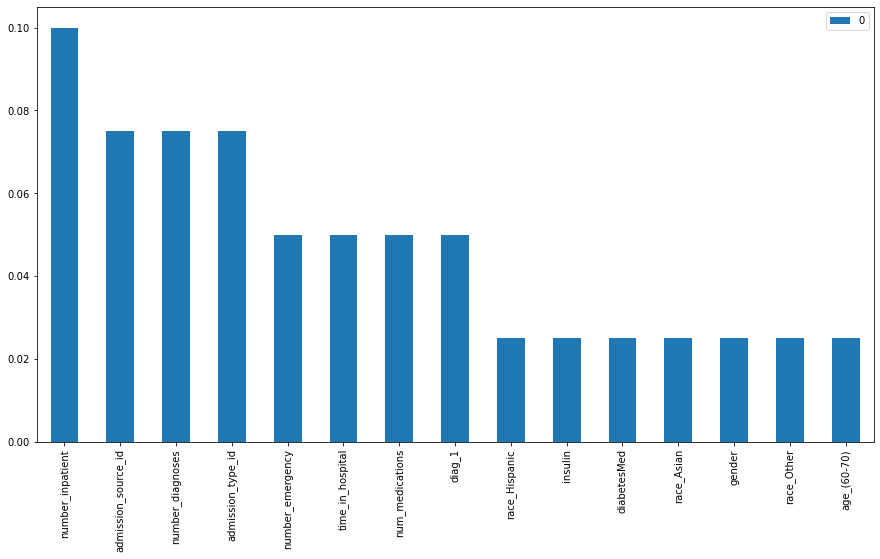

In [49]:
pd.DataFrame(ada_model.feature_importances_,index=X_train.columns).sort_values(0,ascending=False).head(15).plot(kind='bar')

# ADA boost with random forest 

In [39]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10,base_estimator=modelrf_grid)
ada_model.fit(X_train, y_train)
predtrain_ada=ada_model.predict(X_train)
predtest_ada=ada_model.predict(X_test)

In [40]:
print(classification_report(y_train,predtrain_ada))
print(classification_report(y_test,predtest_ada))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83     29330
           1       0.82      0.60      0.69     19973

    accuracy                           0.78     49303
   macro avg       0.80      0.75      0.76     49303
weighted avg       0.79      0.78      0.78     49303

              precision    recall  f1-score   support

           0       0.65      0.79      0.72     12571
           1       0.56      0.38      0.45      8560

    accuracy                           0.63     21131
   macro avg       0.61      0.59      0.58     21131
weighted avg       0.61      0.63      0.61     21131



In [41]:
print(roc_auc_score(y_train,predtrain_ada)),
print(roc_auc_score(y_test,predtest_ada))

0.7546822671909499
0.5876106936897488


In [42]:
print(f1_score(y_train,predtrain_ada)),
print(f1_score(y_test,predtest_ada))

0.6916344392428251
0.4532982261640799


# ADA boost with desicion tree 

In [52]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10,base_estimator=modeldt_grid)
ada_model.fit(X_train, y_train)
predtrain_ada=ada_model.predict(X_train)
predtest_ada=ada_model.predict(X_test)

In [53]:
print(classification_report(y_train,predtrain_ada))
print(classification_report(y_test,predtest_ada))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74     29330
           1       0.60      0.36      0.45     19973

    accuracy                           0.64     49303
   macro avg       0.63      0.60      0.59     49303
weighted avg       0.63      0.64      0.62     49303

              precision    recall  f1-score   support

           0       0.65      0.82      0.72     12571
           1       0.57      0.34      0.43      8560

    accuracy                           0.63     21131
   macro avg       0.61      0.58      0.58     21131
weighted avg       0.61      0.63      0.60     21131



In [54]:
print(roc_auc_score(y_train,predtrain_ada)),
print(roc_auc_score(y_test,predtest_ada))

0.5973364630386035
0.5824734294255358


In [55]:
print(f1_score(y_train,predtrain_ada)),
print(f1_score(y_test,predtest_ada))

0.4466605845156825
0.42795839697432536


In [ ]:
## XGBoost

In [50]:
xgb = XGBClassifier(max_depth = 10, gamma = 1)



xgb_model=xgb.fit(X_train,y_train)
predtrain_xgb=xgb_model.predict(X_train)
predtest_xgb=xgb_model.predict(X_test)

In [51]:
print(classification_report(y_train,predtrain_xgb))
print(classification_report(y_test,predtest_xgb))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     29330
           1       0.94      0.83      0.88     19973

    accuracy                           0.91     49303
   macro avg       0.92      0.90      0.91     49303
weighted avg       0.91      0.91      0.91     49303

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     12571
           1       0.53      0.40      0.46      8560

    accuracy                           0.61     21131
   macro avg       0.59      0.58      0.58     21131
weighted avg       0.60      0.61      0.60     21131



In [52]:
print(roc_auc_score(y_train,predtrain_xgb)),
print(roc_auc_score(y_test,predtest_xgb))

0.8974999790460386
0.5780413001813252


In [53]:
print(f1_score(y_train,predtrain_xgb)),
print(f1_score(y_test,predtest_xgb))

0.882373305637666
0.4564584436209635


In [ ]:
xgb_model.predict(X_train)

In [ ]:
## GridSearch for XGBoost

In [54]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

 
xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')


xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0, 1, 2, 3, 4],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(3, 10)},
             scoring='roc_auc')

In [55]:
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4} 



In [56]:
xgb_tuned = XGBClassifier(max_depth = 4, gamma = 0,learning_rate=0.2)

xgb_model_grid=xgb_tuned.fit(X_train,y_train)
predtrain_xgb_grid=xgb_model_grid.predict(X_train)
predtest_xgb_grid=xgb_model_grid.predict(X_test)

In [57]:
print(classification_report(y_train,predtrain_xgb_grid))
print(classification_report(y_test,predtest_xgb_grid))

print(roc_auc_score(y_train,predtrain_xgb_grid)),
print(roc_auc_score(y_test,predtest_xgb_grid))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75     29330
           1       0.65      0.34      0.45     19973

    accuracy                           0.66     49303
   macro avg       0.66      0.61      0.60     49303
weighted avg       0.66      0.66      0.63     49303

              precision    recall  f1-score   support

           0       0.65      0.85      0.73     12571
           1       0.59      0.31      0.41      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.58      0.57     21131
weighted avg       0.62      0.63      0.60     21131

0.6078868883493911
0.5823286164492227


In [58]:
print(f1_score(y_train,predtrain_xgb_grid)),
print(f1_score(y_test,predtest_xgb_grid))

0.447427146232607
0.4086744043982895


In [59]:
## Gradient Boosting

In [60]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

In [61]:
gboost_model.fit(X_train, y_train)
predtrain_gb=gboost_model.predict(X_train)
predtest_gb=gboost_model.predict(X_test)

In [62]:
print(classification_report(y_train,predtrain_gb))
print(classification_report(y_test,predtest_gb))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     29330
           1       0.95      0.77      0.85     19973

    accuracy                           0.89     49303
   macro avg       0.90      0.87      0.88     49303
weighted avg       0.90      0.89      0.89     49303

              precision    recall  f1-score   support

           0       0.65      0.79      0.71     12571
           1       0.54      0.38      0.45      8560

    accuracy                           0.62     21131
   macro avg       0.60      0.58      0.58     21131
weighted avg       0.61      0.62      0.60     21131



In [63]:
print(roc_auc_score(y_train,predtrain_gb)),
print(roc_auc_score(y_test,predtest_gb))

0.8698179475466103
0.5810234178278593


In [64]:
print(f1_score(y_train,predtrain_gb)),
print(f1_score(y_test,predtest_gb))

0.8487799479887126
0.44544136931465245


In [ ]:
## Grid Search for Gradient Boosting

# SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 10)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (58660, 39)
After OverSampling, the shape of train_y: (58660,) 

After OverSampling, counts of label '1': 29330
After OverSampling, counts of label '0': 29330


In [59]:
## Gradient Boost after SMOTE

gboost_model_smote = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model_smote=gboost_model_smote.fit(X_train_res, y_train_res)
predtrain_gb_smote=gboost_model_smote.predict(X_train_res)
predtest_gb_smote=gboost_model_smote.predict(X_test)

In [60]:
print(classification_report(y_train_res,predtrain_gb_smote))
print(classification_report(y_test,predtest_gb_smote))

print(roc_auc_score(y_train_res,predtrain_gb_smote)),
print(roc_auc_score(y_test,predtest_gb_smote))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     29330
           1       0.94      0.87      0.90     29330

    accuracy                           0.91     58660
   macro avg       0.91      0.91      0.91     58660
weighted avg       0.91      0.91      0.91     58660

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     12571
           1       0.53      0.42      0.47      8560

    accuracy                           0.62     21131
   macro avg       0.59      0.58      0.58     21131
weighted avg       0.61      0.62      0.61     21131

0.9056256392771905
0.5847558670489936


In [61]:
print(f1_score(y_train_res,predtrain_gb_smote)),
print(f1_score(y_test,predtest_gb_smote))

0.9019621732662747
0.4699888968715303


In [ ]:
## XGBoost after SMOTE

xgb = XGBClassifier(max_depth = 10, gamma = 1)



xgb_model_smote=xgb.fit(X_train_res,y_train_res)
predtrain_xgb_smote=xgb_model_smote.predict(X_train_res)
predtest_xgb_smote=xgb_model_smote.predict(X_test)

In [ ]:
print(classification_report(y_train_res,predtrain_xgb_smote))
print(classification_report(y_test,predtest_xgb_smote))

print(roc_auc_score(y_train_res,predtrain_xgb_smote)),
print(roc_auc_score(y_test,predtest_xgb_smote))

In [ ]:
print(f1_score(y_train_res,predtrain_xgb_smote)),
print(f1_score(y_test,predtest_xgb_smote))

In [ ]:
### Gradiant Boosting Model Tuning

In [65]:
#define a list that has all feature names
predictors = [x for x in X_train.columns]

In [66]:
gbm0 = GradientBoostingClassifier() 
gbm0.fit(X_train,y_train)
gbm0_pred_test = gbm0.predict(X_test)

print('\nGradient Boost [0] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_test, gbm0_pred_test,average='micro'))
print('F1 Score macro        : ', f1_score(y_test, gbm0_pred_test,average='macro'))
print('classification report:\n ', classification_report(y_test, gbm0_pred_test))
print('ROC-AUC Score:\n ', roc_auc_score(y_test, gbm0_pred_test))


Gradient Boost [0] Performance:
-----------------------------------
F1 Score micro        :  0.6313473096398656
F1 Score macro        :  0.5521728332074491
classification report:
                precision    recall  f1-score   support

           0       0.64      0.88      0.74     12571
           1       0.60      0.26      0.36      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.57      0.55     21131
weighted avg       0.62      0.63      0.59     21131

ROC-AUC Score:
  0.5721495735995248


Text(0, 0.5, 'Feature Importance Score')

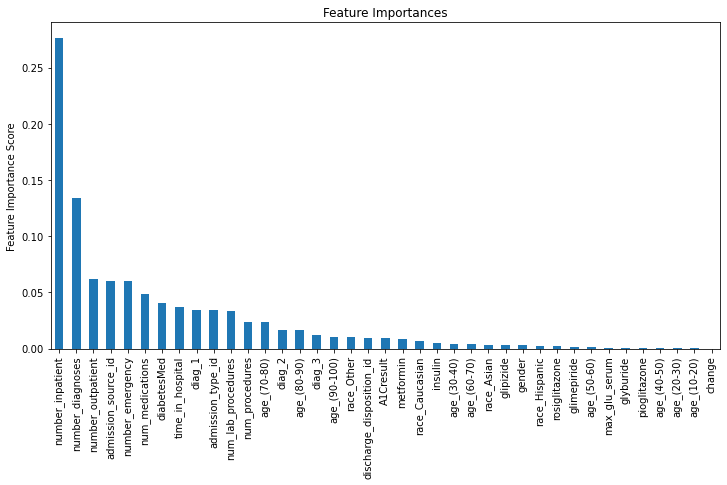

In [67]:
feat_imp = pd.Series(gbm0.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
##### Step 1 - Find the number of estimators for a high learning rate

In [69]:
#1.0 - Grid seach on n_estimators
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               min_samples_split=400, 
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt', 
                                                               subsample=0.8,
                                                               random_state=10)
                                                               , param_grid = param_test1,
                                                               scoring='roc_auc', cv=5)
                        
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=400,
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'n_estimators': range(20, 81, 10)}, scoring='roc_auc')

In [70]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.6514330115243043)

In [72]:
##### Step 2 - Tune tree-specific parameters

In [73]:
#2.1 - Grid seach on max_depth and min_samples_split
param_test2 = {'max_depth':range(3,16,3), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': range(3, 16, 3),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='roc_auc')

In [74]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 600}, 0.6531351250308093)

In [75]:
#2.2 - Grid seach on min_samples_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,min_samples_split=600, 
                                                               max_depth=9, max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  max_features='sqrt',
                                                  min_samples_split=600,
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'min_samples_leaf': range(30, 71, 10)},
             scoring='roc_auc')

In [76]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.653654540996027)

In [77]:
# 2.3 Grid seach on max_features
param_test4 = {'max_features':range(4,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=9, 
                            min_samples_split=600, min_samples_leaf=30, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  min_samples_leaf=30,
                                                  min_samples_split=600,
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'max_features': range(4, 20, 2)}, scoring='roc_auc')

In [78]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 16}, 0.6547729699378365)

In [79]:
#The best parameter values so far: 
gsearch4.best_estimator_

GradientBoostingClassifier(max_depth=9, max_features=16, min_samples_leaf=30,
                           min_samples_split=600, n_estimators=80,
                           random_state=10, subsample=0.8)

In [80]:
gbm1 = GradientBoostingClassifier(max_depth=9, max_features=16, min_samples_leaf=30,
                           min_samples_split=600, n_estimators=80,
                           random_state=10, subsample=0.8) 
gbm1.fit(X_train,y_train)
gbm1_pred_test = gbm1.predict(X_test)

print('\nGradient Boost [1] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_test, gbm1_pred_test,average='micro'))
print('F1 Score macro        : ', f1_score(y_test, gbm1_pred_test,average='macro'))

print('classification report:\n ', classification_report(y_test, gbm1_pred_test))
print('ROC-AUC Score:\n ', roc_auc_score(y_test, gbm1_pred_test))


Gradient Boost [1] Performance:
-----------------------------------
F1 Score micro        :  0.6329089962614168
F1 Score macro        :  0.5762296708799403
classification report:
                precision    recall  f1-score   support

           0       0.65      0.84      0.73     12571
           1       0.58      0.33      0.42      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.58      0.58     21131
weighted avg       0.62      0.63      0.61     21131

ROC-AUC Score:
  0.5845512117341723


Text(0, 0.5, 'Feature Importance Score')

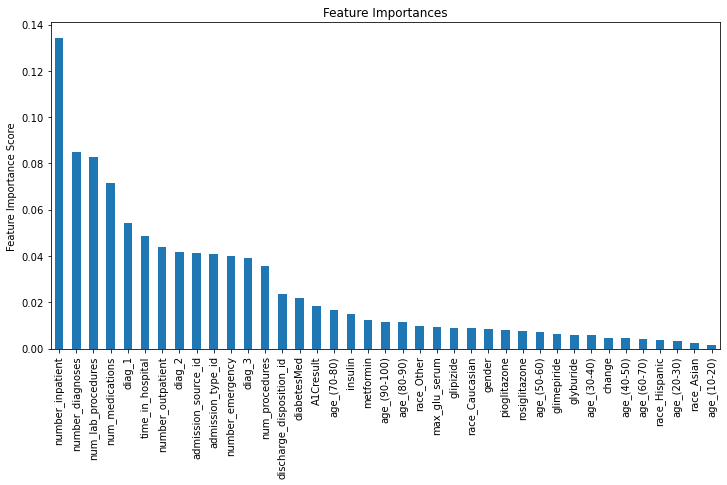

In [81]:
feat_imp = pd.Series(gbm1.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
##### Step3 - Tune Subsample and Lower Learning Rate


In [83]:
#3.1 Grid seach on subsample
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9, 1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               n_estimators=80,
                                                               max_depth=9,
                                                               min_samples_split=600,
                                                               min_samples_leaf=30,
                                                               random_state=10,
                                                               max_features=16),
                       param_grid = param_test5, scoring='roc_auc', cv=5)
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9, max_features=16,
                                                  min_samples_leaf=30,
                                                  min_samples_split=600,
                                                  n_estimators=80,
                                                  random_state=10),
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1]},
             scoring='roc_auc')

In [84]:
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.8}, 0.6547729699378365)

In [85]:
#3.2 reducing the learning rate and proportionally increasing the number of estimators 
gbm2 = GradientBoostingClassifier(max_depth=9, max_features=16, min_samples_leaf=30,
                           min_samples_split=600, n_estimators=80,
                           random_state=10, subsample=0.8, learning_rate=0.1) 
gbm2.fit(X_train,y_train)
gbm2_pred_test = gbm2.predict(X_test)

print('\nGradient Boost [2] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ',f1_score(y_test, gbm2_pred_test,average='micro'))
print('F1 Score macro        : ', f1_score(y_test, gbm2_pred_test,average='macro'))
print('classification report:\n ', classification_report(y_test, gbm2_pred_test))
print('ROC-AUC Score:\n ', roc_auc_score(y_test, gbm2_pred_test))


Gradient Boost [2] Performance:
-----------------------------------
F1 Score micro        :  0.6329089962614168
F1 Score macro        :  0.5762296708799403
classification report:
                precision    recall  f1-score   support

           0       0.65      0.84      0.73     12571
           1       0.58      0.33      0.42      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.58      0.58     21131
weighted avg       0.62      0.63      0.61     21131

ROC-AUC Score:
  0.5845512117341723


Text(0, 0.5, 'Feature Importance Score')

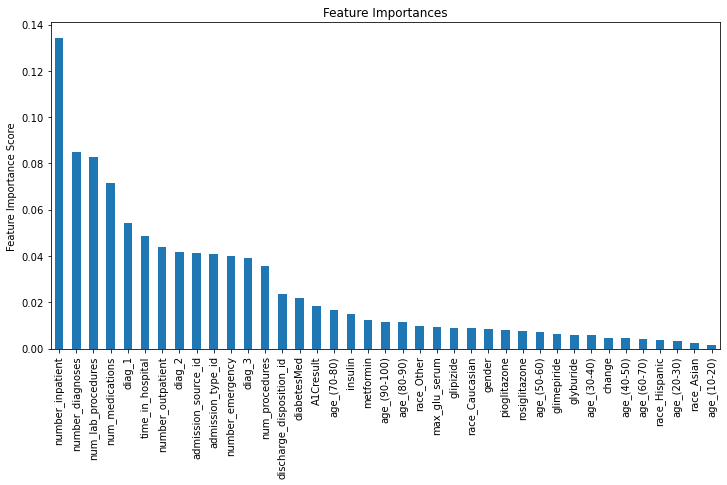

In [86]:
feat_imp = pd.Series(gbm2.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [87]:
#3.3 reducing the learning rate to 50% and proportionally increasing the number of estimators 
gbm3 = GradientBoostingClassifier(max_depth=9, max_features=16, min_samples_leaf=30,
                           min_samples_split=600, n_estimators=140,
                           random_state=10, subsample=0.8, learning_rate=0.05) 
gbm3.fit(X_train,y_train)
gbm3_pred_test = gbm3.predict(X_test)

print('\nGradient Boost [3] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_test, gbm3_pred_test,average='micro'))
print('F1 Score macro        : ', f1_score(y_test, gbm3_pred_test,average='macro'))

print('classification report:\n ', classification_report(y_test, gbm3_pred_test))
print('ROC-AUC Score:\n ', roc_auc_score(y_test, gbm3_pred_test))


Gradient Boost [3] Performance:
-----------------------------------
F1 Score micro        :  0.6321518148691496
F1 Score macro        :  0.5723838958373606
classification report:
                precision    recall  f1-score   support

           0       0.65      0.85      0.73     12571
           1       0.58      0.32      0.41      8560

    accuracy                           0.63     21131
   macro avg       0.61      0.58      0.57     21131
weighted avg       0.62      0.63      0.60     21131

ROC-AUC Score:
  0.5821629360187406


Text(0, 0.5, 'Feature Importance Score')

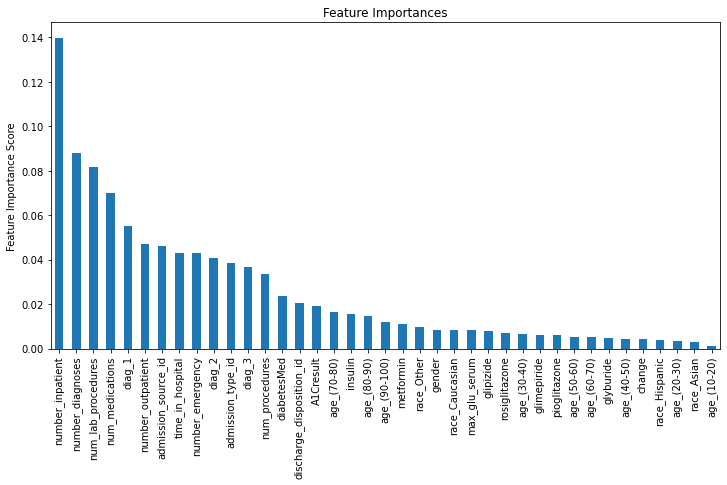

In [88]:
feat_imp = pd.Series(gbm3.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [89]:
#3.4 reducing the learning rate to 10% and proportionally increasing the number of estimators 
gbm4 = GradientBoostingClassifier(max_depth=9,max_features=16,min_samples_leaf=3,
                           min_samples_split=60, n_estimators=700,
                           random_state=10, subsample=0.8,learning_rate=0.01) 
gbm4.fit(X_train,y_train)
gbm4_pred_test = gbm4.predict(X_test)

print('\nGradient Boost [4] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_test, gbm4_pred_test,average='micro'))
print('F1 Score macro        : ', f1_score(y_test, gbm4_pred_test,average='macro'))

print('classification report:\n ', classification_report(y_test, gbm4_pred_test))
print('ROC-AUC Score:\n ', roc_auc_score(y_test, gbm4_pred_test))


Gradient Boost [4] Performance:
-----------------------------------
F1 Score micro        :  0.6327197009133501
F1 Score macro        :  0.5725861859187396
classification report:
                precision    recall  f1-score   support

           0       0.65      0.85      0.73     12571
           1       0.59      0.32      0.41      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.58      0.57     21131
weighted avg       0.62      0.63      0.60     21131

ROC-AUC Score:
  0.582509765095008


Text(0, 0.5, 'Feature Importance Score')

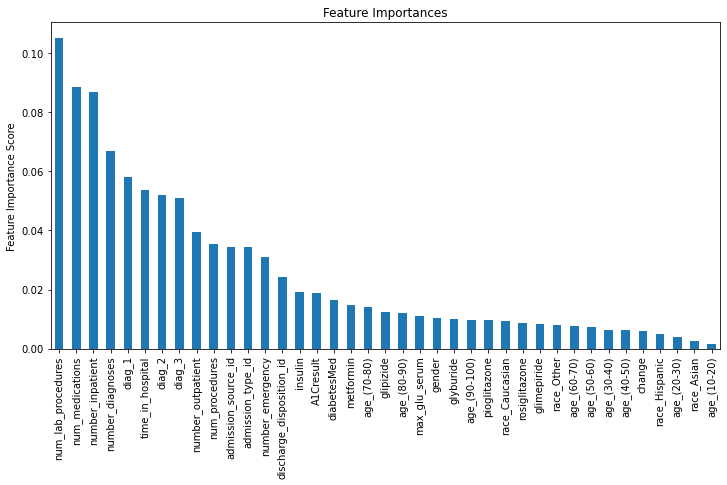

In [90]:
feat_imp = pd.Series(gbm4.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [91]:
#3.5 reducing the learning rate to 5% and proportionally increasing the number of estimators 
gbm5 = GradientBoostingClassifier(max_depth=12, max_features=16, min_samples_leaf=70,
                           min_samples_split=800, n_estimators=1400,
                           random_state=10, subsample=0.8, learning_rate=0.005) 
gbm5.fit(X_train,y_train)
gbm5_pred_test = gbm5.predict(X_test)

print('\nGradient Boost [5] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_test, gbm5_pred_test,average='micro'))
print('F1 Score macro        : ', f1_score(y_test, gbm5_pred_test,average='macro'))

print('classification report:\n ', classification_report(y_test, gbm5_pred_test))
print('ROC-AUC Score:\n ', roc_auc_score(y_test, gbm5_pred_test))


Gradient Boost [5] Performance:
-----------------------------------
F1 Score micro        :  0.6340447683498178
F1 Score macro        :  0.5782132287759887
classification report:
                precision    recall  f1-score   support

           0       0.65      0.84      0.73     12571
           1       0.58      0.33      0.42      8560

    accuracy                           0.63     21131
   macro avg       0.62      0.59      0.58     21131
weighted avg       0.62      0.63      0.61     21131

ROC-AUC Score:
  0.5861021779470179


Text(0, 0.5, 'Feature Importance Score')

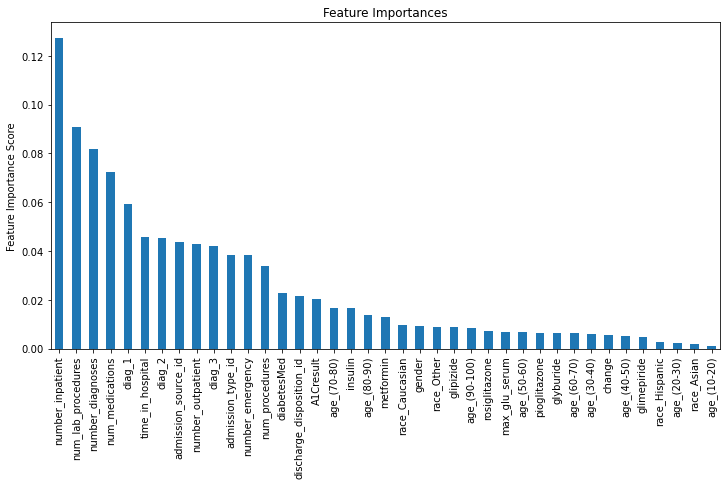

In [92]:
feat_imp = pd.Series(gbm5.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
## Score

In [ ]:
model_all=[modellr,modeldt,modeldt_grid,modelrf,modelrf_grid,ada_model,gboost_model,xgb_model_grid,gbm0,gbm1,gbm2,gbm3,gbm4,gbm5]

model_scores = { "Model Name" : [],
                "Accuracy score train" : [],
               "Precision_score train" : [],
               "Recall_Score train" : [],
               "Roc_AUC_Score train" : [],
                "F1-Score Train" : [],
               "Accuracy score test" : [],
               "Precision_score test" : [],
               "Recall_Score test" : [],
               "Roc_AUC_Score test" : [],
               "F1-Score test" : []}

for model in model_all:
    
    model_scores['Model Name'].append(str(model))
    pred_tr = model.predict(X_train)
    model_scores['Accuracy score train'].append(model.score(X_train,y_train))
     
    model_scores['Precision_score train'].append(precision_score(y_train,pred_tr))
    model_scores['Recall_Score train'].append(recall_score(y_train,pred_tr))
    model_scores['Roc_AUC_Score train'].append(roc_auc_score(y_train,pred_tr))
    model_scores['F1-Score Train'].append(f1_score(y_train,pred_tr))
    
    pred_ts = model.predict(X_test) 
    model_scores['Accuracy score test'].append(model.score(X_test,y_test))
     
    model_scores['Precision_score test'].append(precision_score(y_test,pred_ts))
    model_scores['Recall_Score test'].append(recall_score(y_test,pred_ts))
    model_scores['Roc_AUC_Score test'].append(roc_auc_score(y_test,pred_ts))
    model_scores['F1-Score test'].append(f1_score(y_test,pred_ts))

scores_df=pd.DataFrame(model_scores)

In [248]:
scores_df

,Model Name,Accuracy score train,Precision_score train,Recall_Score train,Roc_AUC_Score train,F1-Score Train,Accuracy score test,Precision_score test,Recall_Score test,Roc_AUC_Score test,F1-Score test,Diff_train_test
0,LogisticRegression(random_state=10),0.622457,0.590131,0.222751,0.558699,0.323423,0.621173,0.583258,0.227103,0.558305,0.326915,0.000394
1,DecisionTreeClassifier(random_state=10),0.999980,1.000000,0.999950,0.999975,0.999975,0.543940,0.440160,0.462734,0.530985,0.451165,0.468990
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.619110,0.593632,0.189506,0.550583,0.287297,0.617623,0.583449,0.196028,0.550365,0.293459,0.000218
3,RandomForestClassifier(random_state=10),0.999980,0.999950,1.000000,0.999983,0.999975,0.622829,0.559692,0.323131,0.575017,0.409717,0.424966
4,"RandomForestClassifier(criterion='entropy', ma...",0.635621,0.642250,0.226956,0.570434,0.335393,0.626615,0.606824,0.222313,0.562115,0.325410,0.008318
5,"AdaBoostClassifier(n_estimators=40, random_sta...",0.628380,0.591367,0.267511,0.570817,0.368381,0.627940,0.588714,0.270561,0.570926,0.370738,-0.000109
6,"GradientBoostingClassifier(max_depth=10, n_est...",0.889135,0.948494,0.768037,0.869818,0.848780,0.619753,0.544274,0.376986,0.581023,0.445441,0.288795
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.658479,0.649300,0.341311,0.607887,0.447427,0.633524,0.589947,0.312617,0.582329,0.408674,0.025558
8,GradientBoostingClassifier(),0.638156,0.626768,0.264006,0.578474,0.371521,0.631395,0.604557,0.260397,0.572208,0.364008,0.006266
9,"GradientBoostingClassifier(max_depth=9, max_fe...",0.676348,0.679286,0.380914,0.629223,0.488115,0.632909,0.582903,0.329790,0.584551,0.421249,0.044672


In [ ]:
scores_df['Diff_train_test']=scores_df['Roc_AUC_Score train']-scores_df['Roc_AUC_Score test']

scores_df.sort_values('Diff_train_test')